In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr

In [ ]:
#!ls /content/drive/MyDrive/
#!mkdir /content/drive/MyDrive/meteogan
!ls /content/drive/MyDrive/meteogan -lrt

total 24984203
-rw------- 1 root root     3397876 Dec 12 07:12 chirps_delhi_1981_2023.nc
-rw------- 1 root root 25580424797 Dec 13 15:16 delhi_pr_300m.nc


In [ ]:
download_data = False

In [ ]:
!git clone https://github.com/scotthosking/get-station-data.git
!mv get-station-data/* .
!pip install -v -e .

Cloning into 'get-station-data'...
remote: Enumerating objects: 381, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 381 (delta 54), reused 54 (delta 47), pack-reused 287
Receiving objects: 100% (381/381), 1.06 MiB | 4.28 MiB/s, done.
Resolving deltas: 100% (196/196), done.
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-m_hc166b/get_station_data.egg-info
  writing /tmp/pip-pip-egg-info-m_hc166b/get_station_data.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-m_hc166b/get_station_data.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-m_hc166b/get_station_data.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-m_hc166b/get_station_data.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-

In [ ]:
import pandas as pd
from get_station_data import ghcnd
from get_station_data.util import nearest_stn

%matplotlib inline

In [ ]:
stn_md = ghcnd.get_stn_metadata()

In [ ]:
delhi_lon_lat = 77.1025, 28.7041
delhi_lon_lat = -97.7431, 30.2672
my_stns = nearest_stn(stn_md,
                        delhi_lon_lat[0], delhi_lon_lat[1],
                        n_neighbours=100)

In [ ]:
df_ = ghcnd.get_data(my_stns)

Using 6 CPUs out of 8... 


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


In [ ]:
df_.element.unique()

array(['PRCP', 'SNOW', 'DAPR', 'MDPR', 'TMAX', 'TMIN', 'WT01', 'WT03',
       'WT16', 'WT09', 'WT04', 'WT18', 'TOBS', 'SNWD', 'WT08', 'WT14',
       'WT05', 'WESD', 'WESF', 'WT11', 'WT06', 'GAHT', 'WT07', 'WSFG',
       'FRGT', 'THIC', 'ACMH', 'ACSH', 'PSUN', 'TSUN', 'WDFM', 'WSFM',
       'WT02', 'PGTM', 'WDFG', 'EVAP', 'MNPN', 'MXPN', 'WDMV', 'DAEV',
       'MDEV', 'DAWM', 'MDWM', 'WDF1', 'WSF1', 'SN02', 'SX02', 'AWND',
       'FMTM', 'WT15', 'WT17', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT13',
       'WT21', 'WT19', 'WT10', 'TAVG', 'WV03', 'WT22', 'ADPT', 'ASLP',
       'ASTP', 'AWBT', 'RHAV', 'RHMN', 'RHMX', 'SN32', 'SX32'],
      dtype=object)

TX AUSTIN
TX AUSTIN 6S
TX AUSTIN-CAMP MABRY
TX HILL'S RANCH
TX AUSTIN WTP
TX AUSTIN BERGSTROM INTL AP


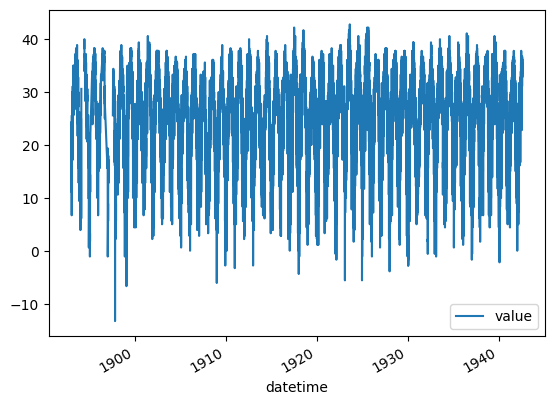

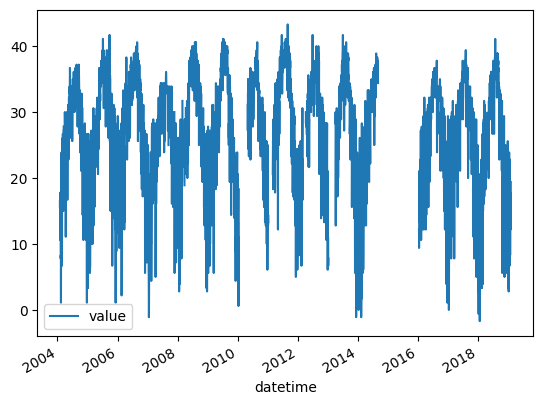

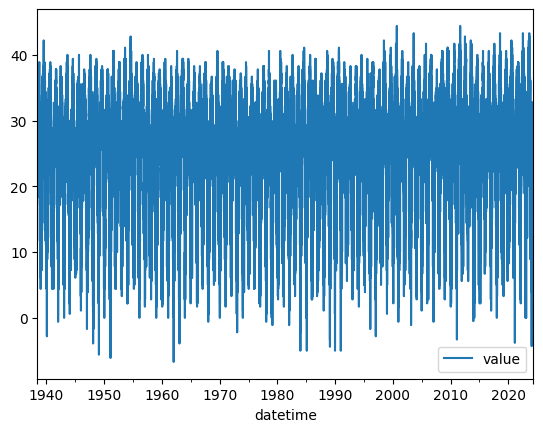

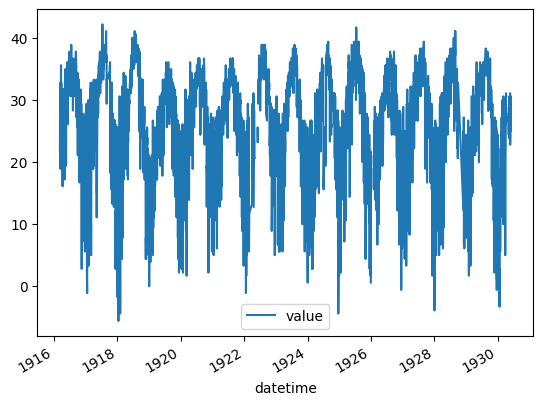

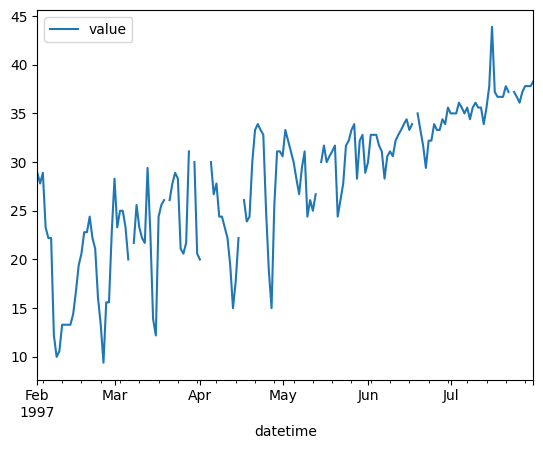

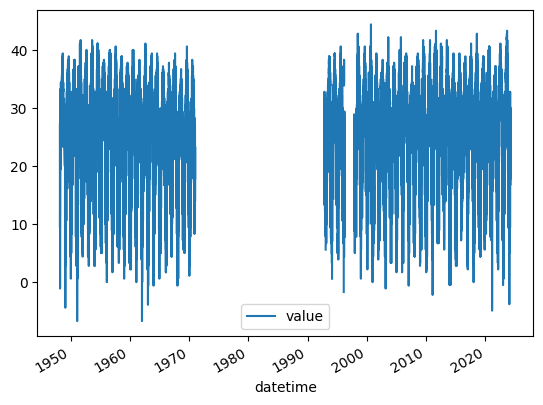

In [ ]:
df__ = df_[df_['element']=='TMAX'].copy()
df_camp_mabry = df__.copy() #  df__[df__['name']=='TX AUSTIN-CAMP MABRY'].copy()
# df_camp_mabry['month'] = df_camp_mabry['month'].astype(str).str.zfill(2)
# df_camp_mabry['day'] = df_camp_mabry['day'].astype(str).str.zfill(2)
# df_camp_mabry['datetime'] = df_camp_mabry['year'].astype(str)+df_camp_mabry['month']+df_camp_mabry['day']
df_camp_mabry['datetime'] = pd.to_datetime(df_camp_mabry['date'], format="%Y-%m-%d")
df_camp_mabry = df_camp_mabry.set_index(['datetime'])
cols = ['value']
for name in df_camp_mabry.name.unique():
    print(name)
    #df_camp_mabry[cols][df_camp_mabry['name']=='TX AUSTIN-CAMP MABRY'].plot()
    df_camp_mabry[cols][df_camp_mabry['name']==name].plot()

In [ ]:
# Found that nan might not be a good choice, rather we should choose the stations which
# have a long term data
stations_with_long_term_data = []
for name in df_camp_mabry.name.unique():
#    print(df_camp_mabry[df_camp_mabry['name']==name].date[0].year, df_camp_mabry[df_camp_mabry['name']==name].date[-1].year)
    if df_camp_mabry[df_camp_mabry['name']==name].date[0].year <=2000 and df_camp_mabry[df_camp_mabry['name']==name].date[-1].year>=2020:
        # Found that a number of stations were started in the year 2013 around Austin with continuous data
        stations_with_long_term_data.append(name)
print(stations_with_long_term_data)

['TX AUSTIN-CAMP MABRY', 'TX AUSTIN BERGSTROM INTL AP']


<Axes: xlabel='datetime'>

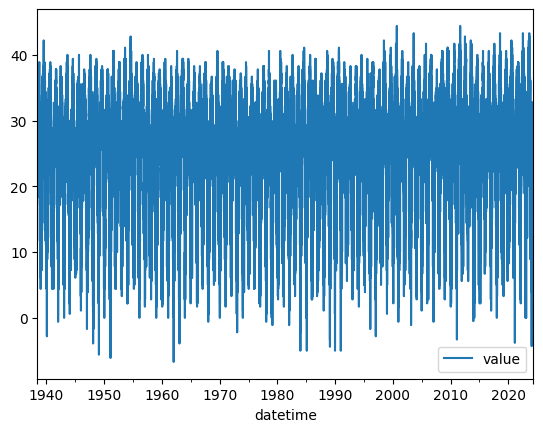

In [ ]:
df_extract = df_camp_mabry[df_camp_mabry['name']=='TX AUSTIN-CAMP MABRY'].copy()
cols = ['value']
df_extract[cols][df_extract['name']=='TX AUSTIN-CAMP MABRY'].plot()

In [ ]:
df_extract

,station,element,value,mflag,qflag,sflag,date,lon,lat,elev,name
datetime,,,,,,,,,,,
1938-06-01,USW00013958,TMAX,32.8,,,0,1938-06-01,-97.7603,30.3208,204.2,TX AUSTIN-CAMP MABRY
1938-06-02,USW00013958,TMAX,34.4,,,0,1938-06-02,-97.7603,30.3208,204.2,TX AUSTIN-CAMP MABRY
1938-06-03,USW00013958,TMAX,34.4,,,0,1938-06-03,-97.7603,30.3208,204.2,TX AUSTIN-CAMP MABRY
1938-06-04,USW00013958,TMAX,32.2,,,0,1938-06-04,-97.7603,30.3208,204.2,TX AUSTIN-CAMP MABRY
1938-06-05,USW00013958,TMAX,34.4,,,0,1938-06-05,-97.7603,30.3208,204.2,TX AUSTIN-CAMP MABRY
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,USW00013958,TMAX,NaN,,,,2024-04-26,-97.7603,30.3208,204.2,TX AUSTIN-CAMP MABRY
2024-04-27,USW00013958,TMAX,NaN,,,,2024-04-27,-97.7603,30.3208,204.2,TX AUSTIN-CAMP MABRY
2024-04-28,USW00013958,TMAX,NaN,,,,2024-04-28,-97.7603,30.3208,204.2,TX AUSTIN-CAMP MABRY


In [ ]:
from google.colab import files

monthly_avg = df_extract[cols].resample('M').mean()
# Save the monthly averages to an Excel file
monthly_avg.to_excel('tmax_camp_mabry_monthly_average.xlsx')

# Provide a download link for the Excel file
files.download('tmax_camp_mabry_monthly_average.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_stations = pd.DataFrame()
cols = ['value']
for name in stations_with_long_term_data:
    print(name)
    #df_camp_mabry[cols][df_camp_mabry['name']=='TX AUSTIN-CAMP MABRY'].plot()
    # df_camp_mabry[cols][df_camp_mabry['name']==name].plot()
    df_stations = df_stations.append(df_camp_mabry[df_camp_mabry['name']==name])
df_stations.to_csv('delhi_stations.csv', sep=',')

NEW DELHI/PALAM
NEW DELHI/SAFDARJUN


<ipython-input-12-2ad1fd22c46f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stations = df_stations.append(df_camp_mabry[df_camp_mabry['name']==name])
<ipython-input-12-2ad1fd22c46f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stations = df_stations.append(df_camp_mabry[df_camp_mabry['name']==name])


In [ ]:
# This option stays to give the user a choice to select stations without nans
stations_without_nan = []
cols = ['value']
for name in df_camp_mabry.name.unique():
    #print(name)
    #df_camp_mabry[cols][df_camp_mabry['name']=='TX AUSTIN-CAMP MABRY'].plot()
    #print(df_camp_mabry[cols][df_camp_mabry['name']==name][:-15].isnull().values.any())
    if not df_camp_mabry[cols][df_camp_mabry['name']==name][:-15].isnull().values.any():
        stations_without_nan.append(name)
    #print(df_camp_mabry[cols][df_camp_mabry['name']==name])
print(stations_without_nan)

['CHANDRAWAL      OBSY', 'NAJAFGARH', 'SHAHDARA', 'DASNA', 'DUJANA', 'BULANDSHAHR     OBSY', 'PUNAHANA', 'CHHOTA KOSI', 'PAHARI', 'RAMGARH', 'BEHROD', 'BADSIKRI', 'DEEG']


In [ ]:
cond = (df_stations['date'].index.year<=2022) & (df_stations['date'].index.year>=2000)
#df_stations[cond]
df_stations[cond]
# Loop over the datetime for which all stations are available and then make supervised learning dataset for downscalebench

,station,element,value,mflag,qflag,sflag,date,lon,lat,elev,name
datetime,,,,,,,,,,,
2016-02-01,IN022023000,PRCP,NaN,,,,2016-02-01,77.117,28.567,233.0,NEW DELHI/PALAM
2016-02-02,IN022023000,PRCP,NaN,,,,2016-02-02,77.117,28.567,233.0,NEW DELHI/PALAM
2016-02-03,IN022023000,PRCP,NaN,,,,2016-02-03,77.117,28.567,233.0,NEW DELHI/PALAM
2016-02-04,IN022023000,PRCP,NaN,,,,2016-02-04,77.117,28.567,233.0,NEW DELHI/PALAM
2016-02-05,IN022023000,PRCP,NaN,,,,2016-02-05,77.117,28.567,233.0,NEW DELHI/PALAM
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,IN022021900,PRCP,NaN,,,,2022-12-27,77.200,28.583,216.0,NEW DELHI/SAFDARJUN
2022-12-28,IN022021900,PRCP,NaN,,,,2022-12-28,77.200,28.583,216.0,NEW DELHI/SAFDARJUN
2022-12-29,IN022021900,PRCP,NaN,,,,2022-12-29,77.200,28.583,216.0,NEW DELHI/SAFDARJUN


In [ ]:
# df_stations_ = df_stations[cond]
# cond = df_stations.name == [stations_without_nan]
print(df_stations[df_stations['name'].isin(stations_with_long_term_data)].name.unique())
df_stations =  df_stations[df_stations['name'].isin(stations_with_long_term_data)]

['NEW DELHI/PALAM' 'NEW DELHI/SAFDARJUN']


# CHIRPS downloaded from website

In [ ]:
if download_data:
    for year in range(1981,2024):
        print('wget https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.'+str(year)+'.days_p05.nc')
        cmd = 'wget https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.'+str(year)+'.days_p05.nc'
        !{cmd}

In [ ]:
if download_data:
    import xarray as xr
    ds = xr.open_mfdataset('chirps-v2.0.*.days_p05.nc').sel(latitude=slice(delhi_lon_lat[1]-0.5, delhi_lon_lat[1]+0.5)).sel(longitude=slice(delhi_lon_lat[0]-0.5, delhi_lon_lat[0]+0.5))
    ds

In [ ]:
if download_data:
    ds.to_netcdf('chirps_delhi_1981_2023.nc')
    !mv chirps_delhi_1981_2023.nc /content/drive/MyDrive/meteogan

In [ ]:
if not download_data:
    ds = xr.open_dataset('/content/drive/MyDrive/meteogan/chirps_delhi_1981_2023.nc')

In [ ]:
df = ds.precip.mean(dim='time').to_dataframe().reset_index().dropna()
df

,latitude,longitude,precip
0,28.224998,76.625000,1.765191
1,28.224998,76.674988,1.773698
2,28.224998,76.725006,1.774824
3,28.224998,76.774994,1.801538
4,28.224998,76.825012,1.806290
...,...,...,...
395,29.174995,77.375000,2.355910
396,29.174995,77.424988,2.418875
397,29.174995,77.475006,2.415642
398,29.174995,77.524994,2.452025


In [ ]:
import plotly.express as px
# df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="precip",
                  color_continuous_scale=px.colors.sequential.Viridis_r, size_max=8, zoom=7, size="precip")#,
                  #mapbox_style="carto-positron")
fig.update_layout(mapbox_style="open-street-map",autosize=True)
fig.show()

In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 89.3 MB/s eta 0:00:00


In [ ]:
!pip install osmnx geopandas cartopy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 2.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [ ]:
df_stations_unique = df_stations.drop_duplicates(subset='name', keep='first')
df_stations_ = df_stations[df_stations.name=='NEW DELHI/SAFDARJUN']

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip



28.583 77.2


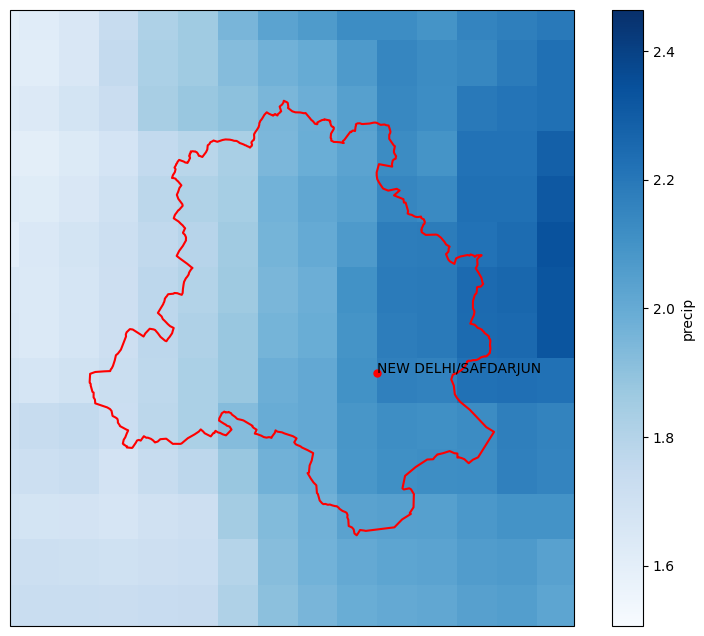

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree()})
def plot_city_boundary_with_cartopy(city_name, country, ax):
    # Download city boundaries using osmnx
    city = ox.geocode_to_gdf(f"{city_name}, {country}")

    # Create a cartopy plot

    ax.set_title(f"Boundary of {city_name}")

    # Add natural features for context
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot the city boundary
    city.boundary.plot(ax=ax, color='red')

    # Set the extent to the city boundary with some margin
    margin = 0.1
    minx, miny, maxx, maxy = city.total_bounds
    ax.set_extent([minx - margin, maxx + margin, miny - margin, maxy + margin], crs=ccrs.PlateCarree())

    #plt.show()

# Plotting the boundary for Delhi, India
plot_city_boundary_with_cartopy("Delhi", "India", ax=ax)
ds.precip.mean(dim='time').plot(cmap='Blues', ax=ax)

for i in range(1,df_stations_unique.shape[0]):
    print(df_stations_unique.lat.iloc[i], df_stations_unique.lon.iloc[i])

    # Latitude and Longitude to mark
    lat, lon, name = df_stations_unique.lat.iloc[i], df_stations_unique.lon.iloc[i], df_stations_unique.name.iloc[i]

    # Mark the specified latitude and longitude
    ax.plot(lon, lat, 'ro', markersize=5, transform=ccrs.PlateCarree())
    ax.text(lon, lat, name, transform=ccrs.PlateCarree())

<Axes: xlabel='datetime'>

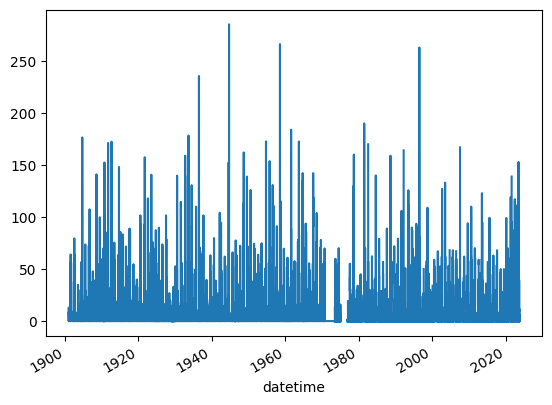

In [ ]:
df_stations[df_stations.name=='NEW DELHI/SAFDARJUN'].value.plot()

In [ ]:
if download_data:
    ds = xr.open_mfdataset('chirps-v2.0.*.days_p05.nc').sel(latitude=slice(delhi_lon_lat[1]-0.5, delhi_lon_lat[1]+0.5)).sel(longitude=slice(delhi_lon_lat[0]-0.5, delhi_lon_lat[0]+0.5)).compute()
else:
    ds = xr.open_dataset('/content/drive/MyDrive/meteogan/chirps_delhi_1981_2023.nc')
ds_station = ds.precip
ds_station_gridded = ds_station.sel(longitude=df_stations_.lon.iloc[0], method='nearest').sel(latitude=df_stations_.lat.iloc[0], method='nearest')

In [ ]:
gridded = []
station = []
time = []

for i in range(ds_station_gridded.shape[0]):
    try:
        station.append(df_stations_[df_stations_.date==ds_station_gridded.time[i].values.astype('M8[D]').astype('O').strftime('%Y-%m-%d')].value[0])
        gridded.append(ds_station_gridded.values[i])
        #time.append(time[i].values.astype('M8[D]').astype('O').strftime('%Y-%m-%d'))
    except:
        continue

In [ ]:
import numpy as np
df_compare = pd.DataFrame()
df_compare['gridded'] = np.array(gridded)
df_compare['station'] = np.array(station)
df_compare = df_compare.dropna()

In [ ]:
df_compare

,gridded,station
0,0.000000,0.0
1,0.000000,0.0
4,0.000000,19.1
5,0.000000,0.0
6,0.000000,0.0
...,...,...
14498,0.000000,0.0
14501,25.100695,4.1
14502,40.040234,1.0
14503,0.000000,11.9


In [ ]:
import numpy as np

def rmse(predictions, targets):
    """
    Calculate the Root Mean Square Error (RMSE) between predictions and targets.

    Parameters:
    - predictions: Array-like, predicted values.
    - targets: Array-like, true values.

    Returns:
    - RMSE value.
    """
    differences = predictions - targets  # Subtract values
    differences_squared = differences ** 2  # Square the differences
    mean_difference_squared = differences_squared.mean()  # Find the mean of the squared differences
    rmse_val = np.sqrt(mean_difference_squared)  # Take the square root of the mean
    return rmse_val

# Example usage:
predictions = df_compare.gridded.values
targets = df_compare.station.values
print(rmse(predictions, targets))

12.21956025717359


# Bicubic Interpolation

In [ ]:
ds = ds.precip.compute()

In [ ]:
ds.values.shape

(15613, 20, 20)

In [ ]:
from scipy.ndimage import zoom
reduced_data = zoom(ds.values, (1, 0.5, 0.5), order=3)

# Ensure the shape is exactly (15583, 10, 10)
reduced_data = reduced_data[:, :10, :10]

# Resize it back to the original size using bicubic interpolation
resized_data = zoom(reduced_data, (1, 2, 2), order=3)

# Ensure the shape is exactly (15583, 20, 20)
resized_data = resized_data[:, :20, :20]

resized_data_2x =  zoom(resized_data, (1, 2, 2), order=3) # 2.5 km
resized_data_4x =  zoom(resized_data_2x, (1, 2, 2), order=3) # 1.25 km
resized_data_8x =  zoom(resized_data_4x, (1, 2, 2), order=3) # 625 m
#resized_data_16x =  zoom(resized_data_8x, (1, 2, 2), order=3) # 312 m

In [ ]:
# Define new 2x finer resolution latitude and longitude coordinates
new_lat = np.linspace(np.min(ds.latitude.values), np.max(ds.latitude.values), 2*len(ds.latitude.values) )
new_lon = np.linspace(np.min(ds.longitude.values), np.max(ds.longitude.values), 2*len(ds.longitude.values))
# Interpolate to the new coordinates
ds_interp_2x = ds.interp(latitude=new_lat, longitude=new_lon)

# Define new 2x finer resolution latitude and longitude coordinates
new_lat = np.linspace(np.min(ds_interp_2x.latitude.values), np.max(ds_interp_2x.latitude.values), 2*len(ds_interp_2x.latitude.values) )
new_lon = np.linspace(np.min(ds_interp_2x.longitude.values), np.max(ds_interp_2x.longitude.values), 2*len(ds_interp_2x.longitude.values))
# Interpolate to the new coordinates
ds_interp_4x = ds_interp_2x.interp(latitude=new_lat, longitude=new_lon)

# Define new 2x finer resolution latitude and longitude coordinates
new_lat = np.linspace(np.min(ds_interp_4x.latitude.values), np.max(ds_interp_4x.latitude.values), 2*len(ds_interp_4x.latitude.values) )
new_lon = np.linspace(np.min(ds_interp_4x.longitude.values), np.max(ds_interp_4x.longitude.values), 2*len(ds_interp_4x.longitude.values))
# Interpolate to the new coordinates
ds_interp_8x = ds_interp_4x.interp(latitude=new_lat, longitude=new_lon)

# # Define new 2x finer resolution latitude and longitude coordinates
# new_lat = np.linspace(np.min(ds_interp_8x.latitude.values), np.max(ds_interp_8x.latitude.values), 2*len(ds_interp_8x.latitude.values) - 1)
# new_lon = np.linspace(np.min(ds_interp_8x.longitude.values), np.max(ds_interp_8x.longitude.values), 2*len(ds_interp_8x.longitude.values) - 1)
# # Interpolate to the new coordinates
# ds_interp_16x = ds_interp_8x.interp(latitude=new_lat, longitude=new_lon)

In [ ]:
ds['bicubic_5km'] = (('time', 'latitude', 'longitude'), resized_data)
ds_interp_2x['bicubic_2_5km'] = (('time', 'latitude', 'longitude'), resized_data_2x)
ds_interp_4x['bicubic_1_25km'] = (('time', 'latitude', 'longitude'), resized_data_4x)
ds_interp_8x['bicubic_600m'] = (('time', 'latitude', 'longitude'), resized_data_8x)
# ds_interp_16x['bicubic_300m'] = (('time', 'latitude', 'longitude'), resized_data_16x)

28.583 77.2


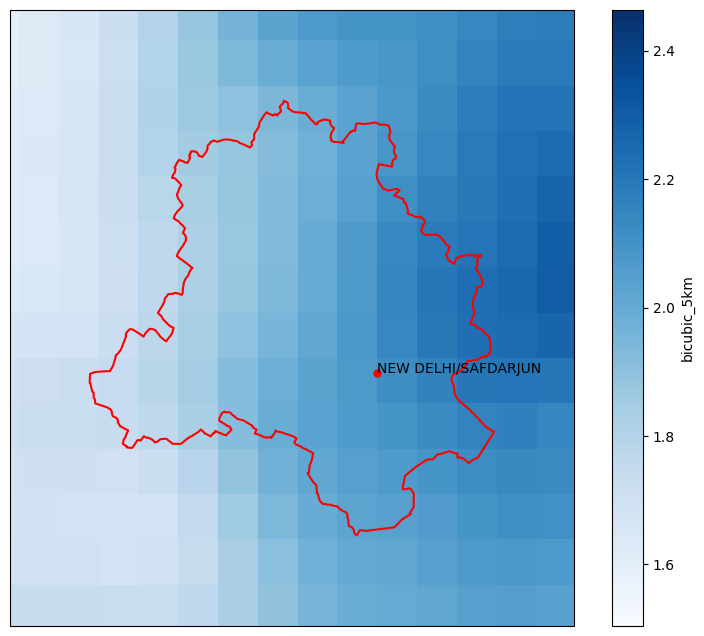

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree()})
def plot_city_boundary_with_cartopy(city_name, country, ax):
    # Download city boundaries using osmnx
    city = ox.geocode_to_gdf(f"{city_name}, {country}")

    # Create a cartopy plot

    ax.set_title(f"Boundary of {city_name}")

    # Add natural features for context
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot the city boundary
    city.boundary.plot(ax=ax, color='red')

    # Set the extent to the city boundary with some margin
    margin = 0.1
    minx, miny, maxx, maxy = city.total_bounds
    ax.set_extent([minx - margin, maxx + margin, miny - margin, maxy + margin], crs=ccrs.PlateCarree())

    #plt.show()

# Plotting the boundary for Delhi, India
plot_city_boundary_with_cartopy("Delhi", "India", ax=ax)
ds['bicubic_5km'].mean(dim='time').plot(cmap='Blues', ax=ax)

for i in range(1,df_stations_unique.shape[0]):
    print(df_stations_unique.lat.iloc[i], df_stations_unique.lon.iloc[i])

    # Latitude and Longitude to mark
    lat, lon, name = df_stations_unique.lat.iloc[i], df_stations_unique.lon.iloc[i], df_stations_unique.name.iloc[i]

    # Mark the specified latitude and longitude
    ax.plot(lon, lat, 'ro', markersize=5, transform=ccrs.PlateCarree())
    ax.text(lon, lat, name, transform=ccrs.PlateCarree())

In [ ]:
ds_station = ds['bicubic_5km'].compute()
ds_station_gridded = ds_station.sel(longitude=df_stations_.lon.iloc[0], method='nearest').sel(latitude=df_stations_.lat.iloc[0], method='nearest')
ds_station_gridded_2x = ds_interp_2x['bicubic_2_5km'].sel(longitude=df_stations_.lon.iloc[0], method='nearest').sel(latitude=df_stations_.lat.iloc[0], method='nearest')
ds_station_gridded_4x = ds_interp_4x['bicubic_1_25km'].sel(longitude=df_stations_.lon.iloc[0], method='nearest').sel(latitude=df_stations_.lat.iloc[0], method='nearest')
ds_station_gridded_8x = ds_interp_8x['bicubic_600m'].sel(longitude=df_stations_.lon.iloc[0], method='nearest').sel(latitude=df_stations_.lat.iloc[0], method='nearest')

gridded = []
gridded_2x = []
gridded_4x = []
gridded_8x = []
station = []
time = []

for i in range(ds_station_gridded.shape[0]):
    try:
        station.append(df_stations_[df_stations_.date==ds_station_gridded.time[i].values.astype('M8[D]').astype('O').strftime('%Y-%m-%d')].value[0])
        gridded.append(ds_station_gridded.values[i])
        gridded_2x.append(ds_station_gridded_2x.values[i])
        gridded_4x.append(ds_station_gridded_4x.values[i])
        gridded_8x.append(ds_station_gridded_8x.values[i])
        #time.append(time[i].values.astype('M8[D]').astype('O').strftime('%Y-%m-%d'))
    except:
        continue

import numpy as np
df_compare = pd.DataFrame()
df_compare['gridded'] = np.array(gridded)
df_compare['gridded_2x'] = np.array(gridded_2x)
df_compare['gridded_4x'] = np.array(gridded_4x)
df_compare['gridded_8x'] = np.array(gridded_8x)
df_compare['station'] = np.array(station)



df_compare = df_compare.dropna()
predictions = df_compare.gridded.values
targets = df_compare.station.values
print('At 5 km, RMSE = ',rmse(predictions, targets))

predictions = df_compare.gridded_2x.values
targets = df_compare.station.values
print('At 2.5 km, RMSE = ',rmse(predictions, targets))

predictions = df_compare.gridded_4x.values
targets = df_compare.station.values
print('At 1.25 km, RMSE = ',rmse(predictions, targets))

predictions = df_compare.gridded_8x.values
targets = df_compare.station.values
print('At 600 m, RMSE = ',rmse(predictions, targets))

At 5 km, RMSE =  12.168674789541948
At 2.5 km, RMSE =  12.133698701229191
At 1.25 km, RMSE =  12.109989110735322
At 600 m, RMSE =  12.100288696018453


In [ ]:
import numpy as np

def psnr(original, compressed):
    """
    Calculate the Peak Signal-to-Noise Ratio (PSNR) between the original and compressed images.

    Parameters:
    - original: Array-like, original image.
    - compressed: Array-like, compressed or reconstructed image.

    Returns:
    - PSNR value.
    """
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = np.max(original)
    psnr_val = 10 * np.log10(max_pixel**2 / mse)
    return psnr_val

# Example usage:
original = df_compare.station.values
compressed = df_compare.gridded.values
print('At 5 km, PSNR = ',psnr(original, compressed))  # Outputs: 24.130

original = df_compare.station.values
compressed = df_compare.gridded_2x.values
print('At 2.5 km, PSNR = ',psnr(original, compressed))  # Outputs: 24.130

original = df_compare.station.values
compressed = df_compare.gridded_4x.values
print('At 1.25 km, PSNR = ',psnr(original, compressed))  # Outputs: 24.130

original = df_compare.station.values
compressed = df_compare.gridded_8x.values
print('At 600 m, PSNR = ',psnr(original, compressed))  # Outputs: 24.130

At 5 km, PSNR =  26.690946029221664
At 2.5 km, PSNR =  26.715947591552602
At 1.25 km, PSNR =  26.73293666958774
At 600 m, PSNR =  26.73989708010889


# Iterative SRCNN

In [ ]:
df_stations_saf = df_stations[df_stations.name=='NEW DELHI/SAFDARJUN']
date_range_1 = pd.DatetimeIndex(ds.time.values)
date_range_2 = df_stations_saf.index
overlapping_dates = date_range_2.intersection(date_range_1)
# selected_rows = df_stations[(df_stations.name == 'NEW DELHI/SAFDARJUN') & (df_stations.index.isin(overlapping_dates))].sort_index()
selected_rows = df_stations_saf[df_stations_saf.index.isin(overlapping_dates)].sort_index()

In [ ]:
ds = ds.sel(time=overlapping_dates).copy()
# Create new dim/coordinate for stations
ds['stations'] = (('time'), selected_rows.value.values)

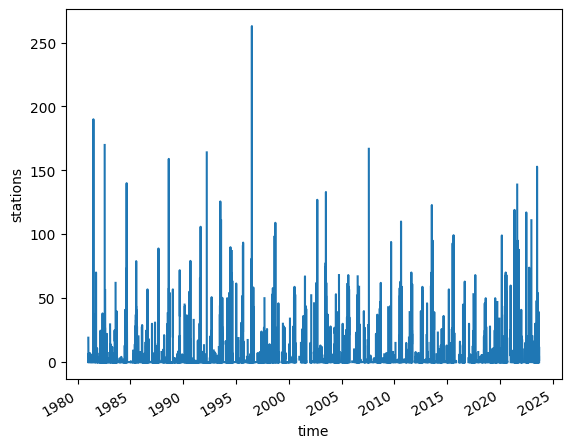

In [ ]:
ds.stations.plot()

In [ ]:
generator_target = ds.values
generator_input = ds.bicubic_5km.values
discriminator_target = ds.stations.values

In [ ]:
print(generator_target.shape, generator_input.shape)

(14517, 20, 20) (14517, 20, 20)


In [ ]:
# SRCNN
# Input ds.bicubic_5km
# Target ds.precip

In [ ]:
!pip install tensorboard

In [ ]:
%load_ext tensorboard

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Resize
from PIL import Image
import os
import numpy as np
from torch.utils.tensorboard import SummaryWriter

In [ ]:
class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=9, padding=4)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=1, padding=0)
        self.conv3 = nn.Conv2d(32, 1, kernel_size=5, padding=2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.conv3(x)
        return x

In [ ]:
class ncDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __getitem__(self, index):
        x = torch.from_numpy(self.data[index]).unsqueeze(0)
        y = torch.from_numpy(self.targets[index]).unsqueeze(0)
        # x = self.data[index]
        # y = self.targets[index]
        # x = x.to(dtype=torch.float32)
        # y = y.to(dtype=torch.float32)
        return x, y

    def __len__(self):
        return len(self.data)

In [ ]:
x_train = generator_input.astype(np.float32)
y_train = generator_target.astype(np.float32)

x_train_max = x_train.max()
y_train_max = y_train.max()
x_train /= x_train_max
y_train /= y_train_max

x_val_ = x_train[10000:12000]
y_val_ = y_train[10000:12000]

x_test_ = x_train[12000:]
y_test_ = y_train[12000:]

x_train_ = x_train[:10000]
y_train_ = y_train[:10000]

In [ ]:
train_dataset = ncDataset(x_train_, y_train_)
val_dataset = ncDataset(x_val_, y_val_)
test_dataset = ncDataset(x_test_, y_test_)

In [ ]:
lr, hr = train_dataset.__getitem__(0)
print(lr.shape, hr.shape, train_dataset.__len__())

torch.Size([1, 20, 20]) torch.Size([1, 20, 20]) 10000


In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=20, shuffle=True)

In [ ]:
for batch in train_dataloader:
    data, targets = batch
    print(data.size())  # Should print torch.Size([20, 1, 30, 30])
    print(targets.size())  # Should print torch.Size([20, 1, 30, 601])
    break

torch.Size([20, 1, 20, 20])
torch.Size([20, 1, 20, 20])


In [ ]:
def train(model, train_dataloader, val_dataloader, criterion, optimizer, device):
    model.train()
    train_loss = 0.0
    for batch in train_dataloader:
        lr, hr = batch
        lr, hr = lr.to(device), hr.to(device)
        optimizer.zero_grad()
        sr = model(lr)
        loss = criterion(sr, hr)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_dataloader)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_dataloader:
            lr, hr = batch
            lr, hr = lr.to(device), hr.to(device)
            sr = model(lr)
            loss = criterion(sr, hr)
            val_loss += loss.item()

    val_loss /= len(val_dataloader)

    return train_loss, val_loss

In [ ]:
# Initialize the model, loss function, and optimizer
device = 'cuda'
model = SRCNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
writer = SummaryWriter("runs/srcnn")

In [ ]:
from copy import deepcopy

num_epochs = 1000
print_interval = 10
patience = 50
best_val_loss = float('inf')
counter = 0
best_model = None


for epoch in range(1, num_epochs + 1):
    train_loss, val_loss = train(model, train_dataloader, val_dataloader, criterion, optimizer, device)
# Log losses to TensorBoard
    writer.add_scalars("Loss", {"Train": train_loss, "Validation": val_loss}, epoch)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = deepcopy(model)
        counter = 0
    else:
        counter += 1

    if epoch % print_interval == 0:
        print(f"Epoch [{epoch}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if counter >= patience:
        print("Early stopping triggered.")
        break
writer.close()

Epoch [10/1000] - Train Loss: 0.0001, Validation Loss: 0.0001
Epoch [20/1000] - Train Loss: 0.0001, Validation Loss: 0.0001
Epoch [30/1000] - Train Loss: 0.0001, Validation Loss: 0.0001
Epoch [40/1000] - Train Loss: 0.0000, Validation Loss: 0.0001
Epoch [50/1000] - Train Loss: 0.0000, Validation Loss: 0.0001
Epoch [60/1000] - Train Loss: 0.0000, Validation Loss: 0.0001
Epoch [70/1000] - Train Loss: 0.0000, Validation Loss: 0.0001
Epoch [80/1000] - Train Loss: 0.0000, Validation Loss: 0.0001
Early stopping triggered.


In [ ]:
model_save_path = "best_model_srcnn.pth"
torch.save(best_model.state_dict(), model_save_path)

In [ ]:
loaded_model = SRCNN().to(device)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
)

In [ ]:
for batch in test_dataloader:
    lr, hr = batch
    lr, hr = lr.to(device), hr.to(device)
    with torch.no_grad():
        sr = loaded_model(lr)

In [ ]:
x_train = generator_input.astype(np.float32)[:,np.newaxis,:,:]
y_train = generator_target.astype(np.float32)

x_train_max = x_train.max()
y_train_max = y_train.max()
x_train /= x_train_max
y_train /= y_train_max

# x_train_patches = patchify(x_train[:600,:600], patch_size)[:,np.newaxis,:,:]
x_train_tensor = torch.from_numpy(x_train).to(device)
with torch.no_grad():
    predicted_sr = loaded_model(x_train_tensor)
    predicted_sr_ = zoom(predicted_sr.cpu()[:,0,:,:], (1, 2, 2), order=3)

    predicted_sr_2x = loaded_model(torch.from_numpy(predicted_sr_[:,np.newaxis,:,:]).to(device))
    predicted_sr_2x_ = zoom(predicted_sr_2x.cpu()[:,0,:,:], (1, 2, 2), order=3)
    # torch.cuda.empty_cache() # move to A100 GPUs
    # predicted_sr_4x = loaded_model(torch.from_numpy(predicted_sr_2x_[:,np.newaxis,:,:]).to(device)) # move to A100 GPUs
    # predicted_sr_4x_ = zoom(predicted_sr_4x.cpu()[:,0,:,:], (1, 2, 2), order=3) # move to A100 GPUs

    # predicted_sr_8x = loaded_model(torch.from_numpy(predicted_sr_4x_[:,np.newaxis,:,:]).to(device)) # move to A100 GPUs
predicted_sr_np = predicted_sr.cpu().numpy() * y_train_max
predicted_sr_np_2x = predicted_sr_2x.cpu().numpy() * y_train_max
# predicted_sr_np_4x = predicted_sr_4x.cpu().numpy() * y_train_max # move to A100 GPUs
# predicted_sr_np_8x = predicted_sr_8x.cpu().numpy() * y_train_max # move to A100 GPUs

predicted_sr_np[predicted_sr_np<0] = 0.0
predicted_sr_np_2x[predicted_sr_np_2x<0] = 0.0
# predicted_sr_np_4x[predicted_sr_np_4x<0] = 0.0 # move to A100 GPUs
# predicted_sr_np_8x[predicted_sr_np_8x<0] = 0.0 # move to A100 GPUs

In [ ]:
print(predicted_sr.shape, predicted_sr_2x.shape)

torch.Size([14517, 1, 20, 20]) torch.Size([14517, 1, 40, 40])


In [ ]:
print(predicted_sr_np.shape, predicted_sr_np_2x.shape) #, predicted_sr_np_4x.shape, predicted_sr_np_8x.shape)

(14517, 1, 20, 20) (14517, 1, 40, 40)


In [ ]:
ds_interp_2x.shape

(15613, 40, 40)

In [ ]:
predicted_sr_2x.shape

torch.Size([14517, 1, 40, 40])

In [ ]:
ds_interp_2x = ds_interp_2x.sel(time=ds.time.values)
ds_interp_2x['srcnn_2_5km'] = (('time', 'latitude', 'longitude'), predicted_sr_2x.cpu().numpy()[:,0,:,:])

In [ ]:
ds['srcnn_5km'] = (('time', 'latitude', 'longitude'), predicted_sr_np[:,0,:,:])
# ds_interp_2x['srcnn_2_5km'] = (('time', 'latitude', 'longitude'), predicted_sr_np_2x[:,0,:,:])
ds

<xarray.DataArray 'precip' (time: 14517, latitude: 20, longitude: 20)>
array([[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]],

       [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
...
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]],

       [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2023-09-30
  * latitude     (latitude) float32 28.22 28.27 28.32 ... 29.07 29.12 29.17
  * longitude    (longitude) float32 76.62 76.67 76.73 ... 77.48 77.52 77.58
    bicubic_5km  (time, latitude, longitude) float32 1.331e-15 ... -2.691e-20
    stations     (time) float64 0.0 0.0 nan nan 19.1 0.0 ... nan nan nan nan nan
    srcnn_5km    (time, latitude, longitude) float32 0.01353 0.01353 ... 0.01353
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

28.583 77.2


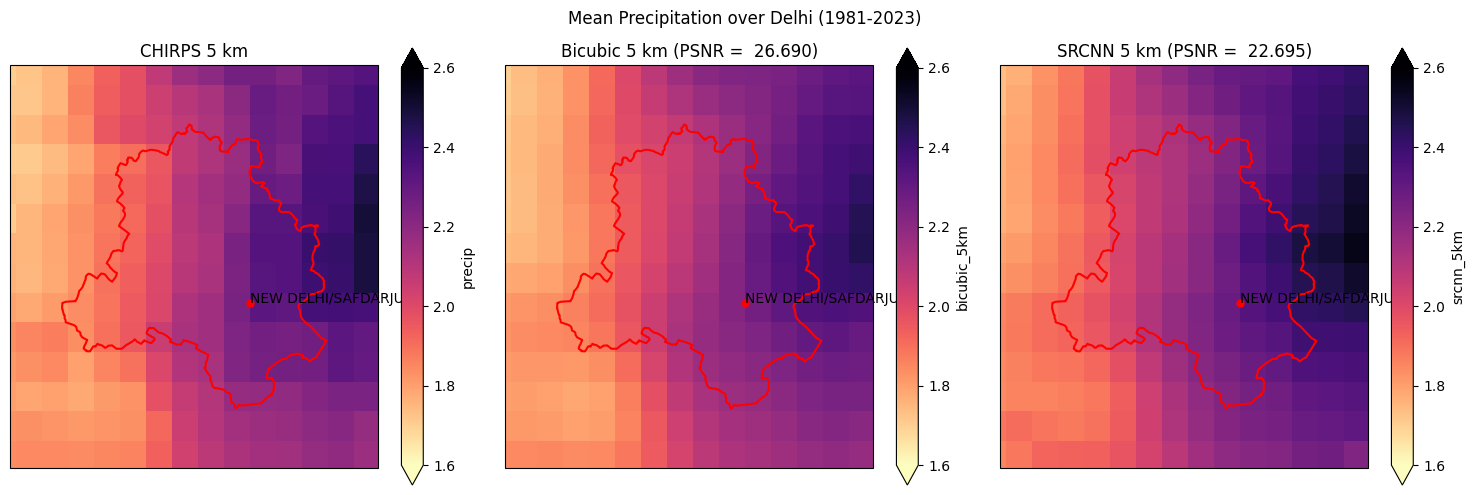

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=3,nrows=1, figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree()})
ds.mean(dim='time').plot(cmap='magma_r', ax=ax[0], vmin=1.6, vmax=2.6, extend='both')
ds.bicubic_5km.mean(dim='time').plot(cmap='magma_r', ax=ax[1], vmin=1.6, vmax=2.6, extend='both')
ds.srcnn_5km.mean(dim='time').plot(cmap='magma_r', ax=ax[2], vmin=1.6, vmax=2.6, extend='both')
titles = ['CHIRPS 5 km','Bicubic 5 km (PSNR =  26.690)', 'SRCNN 5 km (PSNR =  22.695)']
# for i_ax,ax in enumerate([ax[0], ax[1], ax[2]]):
#     plot_city_boundary_with_cartopy("Delhi", "India", ax=ax)
#     ax.set_title(titles[i_ax])
plt.suptitle('Mean Precipitation over Delhi (1981-2023)')

for i in range(1,df_stations_unique.shape[0]):
    print(df_stations_unique.lat.iloc[i], df_stations_unique.lon.iloc[i])

    # Latitude and Longitude to mark
    lat, lon, name = df_stations_unique.lat.iloc[i], df_stations_unique.lon.iloc[i], df_stations_unique.name.iloc[i]

    for i_ax,ax in enumerate([ax[0], ax[1], ax[2]]):
        # Mark the specified latitude and longitude
        ax.plot(lon, lat, 'ro', markersize=5, transform=ccrs.PlateCarree())
        ax.text(lon, lat, name, transform=ccrs.PlateCarree())
        plot_city_boundary_with_cartopy("Delhi", "India", ax=ax)
        ax.set_title(titles[i_ax])

plt.tight_layout()

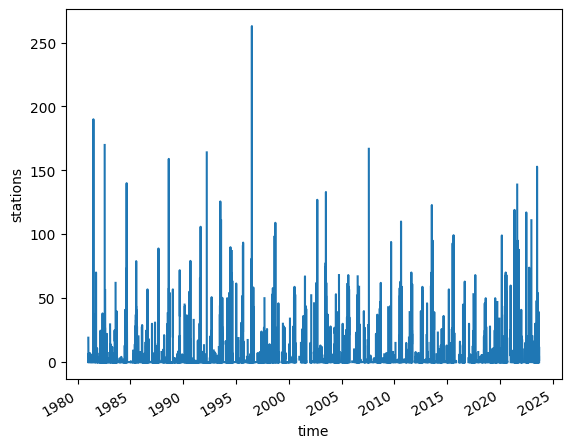

In [ ]:
ds.stations.plot()

28.583 77.2


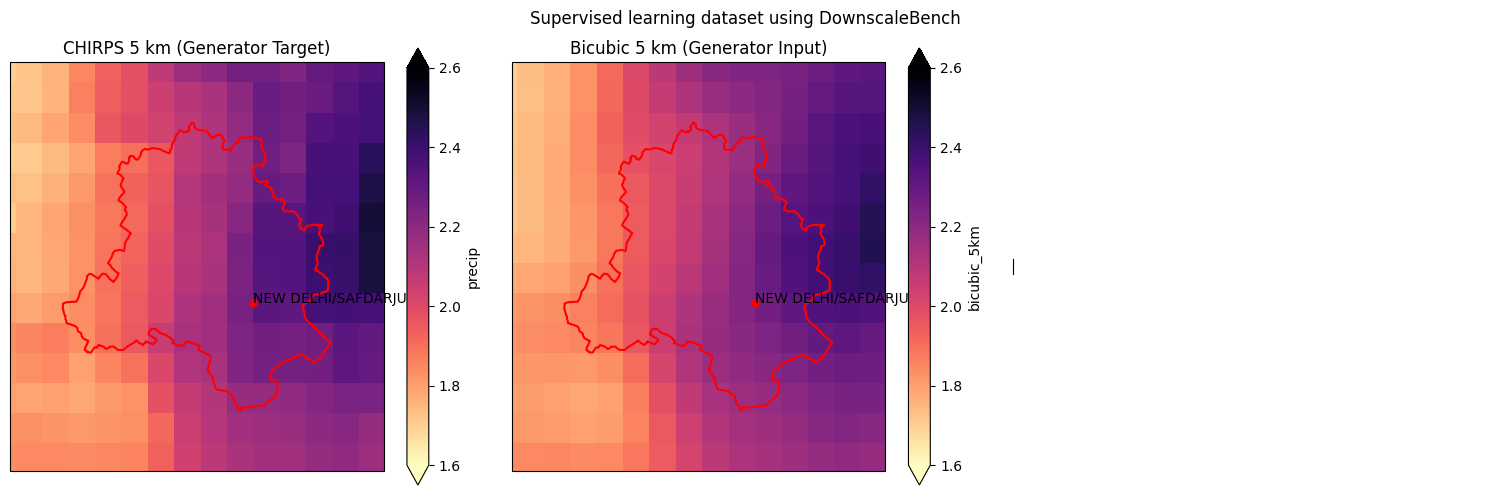

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=3,nrows=1, figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree()})
# ax = ax[0] = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())

ds.mean(dim='time').plot(cmap='magma_r', ax=ax[0], vmin=1.6, vmax=2.6, extend='both')
ds.bicubic_5km.mean(dim='time').plot(cmap='magma_r', ax=ax[1], vmin=1.6, vmax=2.6, extend='both')
ds.stations.plot(ax=ax[2])
titles = ['CHIRPS 5 km (Generator Target)','Bicubic 5 km (Generator Input)', 'Station time seris']
# for i_ax,ax in enumerate([ax[0], ax[1], ax[2]]):
#     plot_city_boundary_with_cartopy("Delhi", "India", ax=ax)
#     ax.set_title(titles[i_ax])
plt.suptitle('Supervised learning dataset using DownscaleBench')

for i in range(1,df_stations_unique.shape[0]):
    print(df_stations_unique.lat.iloc[i], df_stations_unique.lon.iloc[i])

    # Latitude and Longitude to mark
    lat, lon, name = df_stations_unique.lat.iloc[i], df_stations_unique.lon.iloc[i], df_stations_unique.name.iloc[i]

    for i_ax,ax in enumerate([ax[0], ax[1]]):
        # Mark the specified latitude and longitude
        ax.plot(lon, lat, 'ro', markersize=5, transform=ccrs.PlateCarree())
        ax.text(lon, lat, name, transform=ccrs.PlateCarree())
        plot_city_boundary_with_cartopy("Delhi", "India", ax=ax)
        ax.set_title(titles[i_ax])

plt.tight_layout()

In [ ]:
ds_station = ds['srcnn_5km'].compute()
ds_station_gridded = ds_station.sel(longitude=df_stations_.lon.iloc[0], method='nearest').sel(latitude=df_stations_.lat.iloc[0], method='nearest')
# ds_station_gridded_2x = ds_interp_2x['bicubic_2_5km'].sel(longitude=df_stations_.lon.iloc[0], method='nearest').sel(latitude=df_stations_.lat.iloc[0], method='nearest')
# ds_station_gridded_4x = ds_interp_4x['bicubic_1_25km'].sel(longitude=df_stations_.lon.iloc[0], method='nearest').sel(latitude=df_stations_.lat.iloc[0], method='nearest')
# ds_station_gridded_8x = ds_interp_8x['bicubic_600m'].sel(longitude=df_stations_.lon.iloc[0], method='nearest').sel(latitude=df_stations_.lat.iloc[0], method='nearest')

gridded = []
# gridded_2x = []
# gridded_4x = []
# gridded_8x = []
station = []
time = []

for i in range(ds_station_gridded.shape[0]):
    try:
        station.append(df_stations_[df_stations_.date==ds_station_gridded.time[i].values.astype('M8[D]').astype('O').strftime('%Y-%m-%d')].value[0])
        gridded.append(ds_station_gridded.values[i])
        # gridded_2x.append(ds_station_gridded_2x.values[i])
        # gridded_4x.append(ds_station_gridded_4x.values[i])
        # gridded_8x.append(ds_station_gridded_8x.values[i])
        #time.append(time[i].values.astype('M8[D]').astype('O').strftime('%Y-%m-%d'))
    except:
        continue

import numpy as np
df_compare = pd.DataFrame()
df_compare['gridded'] = np.array(gridded)
# df_compare['gridded_2x'] = np.array(gridded_2x)
# df_compare['gridded_4x'] = np.array(gridded_4x)
# df_compare['gridded_8x'] = np.array(gridded_8x)
df_compare['station'] = np.array(station)



df_compare = df_compare.dropna()
predictions = df_compare.gridded.values
targets = df_compare.station.values
print('At 5 km, RMSE = ',rmse(predictions, targets))
print('At 5 km, PSNR = ',psnr(predictions, targets))

# predictions = df_compare.gridded_2x.values
# targets = df_compare.station.values
# print('At 2.5 km, RMSE = ',rmse(predictions, targets))

# predictions = df_compare.gridded_4x.values
# targets = df_compare.station.values
# print('At 1.25 km, RMSE = ',rmse(predictions, targets))

# predictions = df_compare.gridded_8x.values
# targets = df_compare.station.values
# print('At 600 m, RMSE = ',rmse(predictions, targets))

At 5 km, RMSE =  12.134504311537148
At 5 km, PSNR =  22.613474598065388


# DSBench based supervised learning dataset at 2.5 km

In [ ]:
import torch
from torch.utils.data import Dataset

class ncDataset(Dataset):
    def __init__(self, data, targets, discriminator_targets):
        self.data = data
        self.targets = targets
        self.discriminator_targets = discriminator_targets

    def __getitem__(self, index):
        x = torch.from_numpy(self.data[index]).unsqueeze(0).to(dtype=torch.float32)
        y = torch.from_numpy(self.targets[index]).unsqueeze(0).to(dtype=torch.float32)

        # Check if the discriminator target is a single number
        if isinstance(self.discriminator_targets[index], np.ndarray):
            d_y = torch.from_numpy(self.discriminator_targets[index]).unsqueeze(0).to(dtype=torch.float32)
        else:
            # If it's a single number, wrap it in a NumPy array
            d_y = torch.tensor([self.discriminator_targets[index]], dtype=torch.float32).unsqueeze(0)

        return x, y, d_y

    def __len__(self):
        return len(self.data)

In [ ]:
ds_station_ = ds_station.sel(time=ds.time.values)
generator_input = ds_interp_2x
generator_target = ds_interp_2x.srcnn_2_5km
discriminator_target = ds_station.stations.sel(time=ds.time.values)

# For station loss .sel(longitude=df_stations_.lon.iloc[0], method='nearest').sel(latitude=df_stations_.lat.iloc[0], method='nearest')

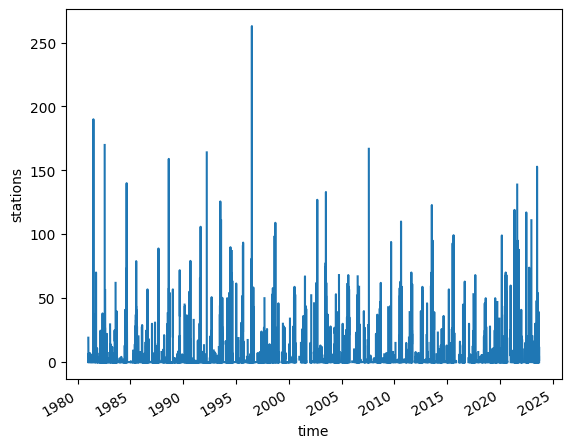

In [ ]:
ds_station.stations.sel(time=ds.time.values).plot()

In [ ]:
# Remove times for which station is nan
times_with_nan = discriminator_target.isnull()

# Step 2: Use these indices to drop the corresponding times from both data1 and data2
generator_input_ = generator_input.where(~times_with_nan, drop=True)
generator_target_ = generator_target.where(~times_with_nan, drop=True)
discriminator_target_ = discriminator_target.where(~times_with_nan, drop=True)

In [ ]:
x_train = generator_input_.values.astype(np.float32)
y_train = generator_target_.values.astype(np.float32)
d_y = discriminator_target_.values.astype(np.float32)

x_train_max = x_train.max()
y_train_max = y_train.max()
d_y_train_max = d_y.max()

x_train /= x_train_max
y_train /= y_train_max
d_y_train =  d_y / d_y_train_max

x_val_ = x_train[6000:7000]
y_val_ = y_train[6000:7000]
d_y_val_ = d_y_train[6000:7000]

x_test_ = x_train[7000:]
y_test_ = y_train[7000:]
d_y_test_ = d_y_train[7000:]

x_train_ = x_train[:6000]
y_train_ = y_train[:6000]
d_y_train_ = d_y_train[:6000]

In [ ]:
train_dataset = ncDataset(x_train_, y_train_, d_y_train_)
val_dataset = ncDataset(x_val_, y_val_, d_y_val_)
test_dataset = ncDataset(x_test_, y_test_, d_y_test_)

In [ ]:
lr, hr, disc = train_dataset.__getitem__(0)
print(lr.shape, hr.shape, disc.shape, train_dataset.__len__())

torch.Size([1, 40, 40]) torch.Size([1, 40, 40]) torch.Size([1, 1]) 6000


In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=20, shuffle=True)

In [ ]:
for batch in train_dataloader:
    data, targets, discs = batch
    print(data.size())  # Should print torch.Size([20, 1, 30, 30])
    print(targets.size())  # Should print torch.Size([20, 1, 30, 601])
    print(discs.size())  # Should print torch.Size([20, 1, 30, 601])
    break

torch.Size([20, 1, 40, 40])
torch.Size([20, 1, 40, 40])
torch.Size([20, 1, 1])


In [ ]:
print(generator_input_.shape, generator_target_.shape, discriminator_target_.shape)

(8692, 40, 40) (8692, 40, 40) (8692,)


In [ ]:
np.sum(np.isnan(discriminator_target_))

<xarray.DataArray 'stations' ()>
array(0)

In [ ]:
def find_nearest(data, target_lat, target_lon):
    # Calculate the absolute difference between target and all data points
    lat_diff = np.abs(data.latitude - target_lat)
    lon_diff = np.abs(data.longitude - target_lon)

    # Identify the indices of the minimum values
    min_lat = lat_diff.argmin()
    min_lon = lon_diff.argmin()

    return min_lat.item(), min_lon.item()  # Convert to Python int for usability

target_lat = df_stations_.lat.iloc[0]  # Example latitude
target_lon = df_stations_.lon.iloc[0]  # Example longitude
i, j = find_nearest(generator_input_, target_lat, target_lon)
station_coords = [i,j]
print(i,j)

15 24


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class StationLoss(nn.Module):
    def __init__(self):
        super(StationLoss, self).__init__()

    def forward(self, output, ground_truth, station_coords):
        """
        Compute the loss based on station data.

        :param output: The output from the SRCNN model converted to xarray
        :param ground_truth: The ground truth values at the station locations - convert to xarray later
        :return: The computed loss.
        """
        # Extract values from the output at station locations
        #values_at_stations = output[:, station_coords[:, 0], station_coords[:, 1]]
        values_at_stations = output[:, 0, station_coords[0], station_coords[1]]

        # Compute the loss
        loss = F.mse_loss(values_at_stations, ground_truth)

        return loss

In [ ]:
def train(model, train_dataloader, val_dataloader, criterion, optimizer, device, station_coords):
    model.train()
    train_loss = 0.0
    for batch in train_dataloader:
        lr, hr, disc = batch
        lr, hr, disc = lr.to(device), hr.to(device), disc.to(device)
        optimizer.zero_grad()
        sr = model(lr)
        #print(sr.shape)
        loss = criterion(sr, disc, station_coords)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_dataloader)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_dataloader:
            # lr, hr = batch
            # lr, hr = lr.to(device), hr.to(device)
            lr, hr, disc = batch
            lr, hr, disc = lr.to(device), hr.to(device), disc.to(device)
            sr = model(lr)
            loss = criterion(sr, disc, station_coords)
            val_loss += loss.item()

    val_loss /= len(val_dataloader)

    return train_loss, val_loss

In [ ]:
# Initialize the model, loss function, and optimizer
device = 'cuda'
model = SRCNN().to(device)
criterion = StationLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
from copy import deepcopy

num_epochs = 1000
print_interval = 10
patience = 50
best_val_loss = float('inf')
counter = 0
best_model = None


for epoch in tqdm(range(1, num_epochs + 1)):
    train_loss, val_loss = train(model, train_dataloader, val_dataloader, criterion, optimizer, device, station_coords)
# Log losses to TensorBoard
    writer.add_scalars("Loss", {"Train": train_loss, "Validation": val_loss}, epoch)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = deepcopy(model)
        counter = 0
    else:
        counter += 1

    if epoch % print_interval == 0:
        print(f"Epoch [{epoch}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if counter >= patience:
        print("Early stopping triggered.")
        break
writer.close()

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-146-21ad6b28306a>:22: UserWarning:

Using a target size (torch.Size([20, 1, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.

  1%|          | 10/1000 [00:10<17:33,  1.06s/it]

Epoch [10/1000] - Train Loss: 0.0014, Validation Loss: 0.0018


  2%|▏         | 20/1000 [00:20<16:15,  1.00it/s]

Epoch [20/1000] - Train Loss: 0.0014, Validation Loss: 0.0018


  3%|▎         | 30/1000 [00:30<16:06,  1.00it/s]

Epoch [30/1000] - Train Loss: 0.0014, Validation Loss: 0.0018


  4%|▍         | 40/1000 [00:40<16:13,  1.01s/it]

Epoch [40/1000] - Train Loss: 0.0014, Validation Loss: 0.0018


  5%|▌         | 50/1000 [00:50<15:44,  1.01it/s]

Epoch [50/1000] - Train Loss: 0.0014, Validation Loss: 0.0018


  6%|▌         | 55/1000 [00:56<16:10,  1.03s/it]

Early stopping triggered.


# Running SRGAN

In [ ]:
# Generator
# Input ds.bicubic_5km
# Target ds.precip

# Discriminator
# Input: Output of Generator
# Target: Station

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision.models import vgg19
import torch.nn as nn

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(in_channels),
            nn.PReLU(),
            nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(in_channels)
        )

    def forward(self, x):
        return x + self.block(x)

class UpsampleBlock(nn.Module):
    def __init__(self, in_channels, scale_factor):
        super(UpsampleBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, in_channels * scale_factor**2, kernel_size=3, padding=1),
            nn.PixelShuffle(scale_factor),
            nn.PReLU()
        )

    def forward(self, x):
        return self.block(x)


class Generator(nn.Module):
    def __init__(self, scale_factor):
        upsample_block_num = int(scale_factor / 2)
        super(Generator, self).__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=9, padding=4),
            nn.PReLU()
        )
        self.block2 = ResidualBlock(64)
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64)
        )
        block4 = [UpsampleBlock(64, 2) for _ in range(upsample_block_num)]
        block4.append(nn.Conv2d(64, 3, kernel_size=9, padding=4))
        self.block4 = nn.Sequential(*block4)

    def forward(self, x):
        block1 = self.block1(x)
        block2 = self.block2(block1)
        block3 = self.block3(block2)
        block4 = self.block4(block1 + block3)
        return (torch.tanh(block4) + 1) / 2



class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(512, 1024, kernel_size=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(1024, 1, kernel_size=1)
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
scale_factor = 4  # replace with the value you need
generator = Generator(scale_factor)
discriminator = Discriminator()

# Define Loss Functions
criterion_G = nn.MSELoss()
criterion_D = nn.BCEWithLogitsLoss()

# Define Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=1e-4)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=1e-4)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
from PIL import Image
import random

In [ ]:
class RandomImageDataset(Dataset):
    def __init__(self, num_samples, hr_size, lr_size, transform=None):
        self.num_samples = num_samples
        self.hr_size = hr_size
        self.lr_size = lr_size
        self.transform = transform

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        # Generating random images as numpy arrays
        hr_image = np.random.rand(*self.hr_size, 3) * 255
        lr_image = np.random.rand(*self.lr_size, 3) * 255

        # Converting numpy arrays to PIL Images
        hr_image = Image.fromarray(hr_image.astype('uint8'))
        lr_image = Image.fromarray(lr_image.astype('uint8'))

        if self.transform:
            hr_image = self.transform(hr_image)
            lr_image = self.transform(lr_image)

        return hr_image, lr_image

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = RandomImageDataset(num_samples=100, hr_size=(256, 256), lr_size=(64, 64), transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [ ]:
!pip install tqdm

In [ ]:
num_epochs = 100
for epoch in tqdm(range(num_epochs)):
    for data in dataloader:
        # Load data
        high_res, low_res = data

        # Train Discriminator
        optimizer_D.zero_grad()
        real_labels = torch.ones(high_res.size(0), 1)
        fake_labels = torch.zeros(high_res.size(0), 1)

        outputs = discriminator(high_res).view(-1, 1)
        real_loss = criterion_D(outputs, real_labels)

        fake_images = generator(low_res)
        outputs = discriminator(fake_images.detach()).view(-1, 1)
        fake_loss = criterion_D(outputs, fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        outputs = discriminator(fake_images).view(-1, 1)
        g_adv_loss = criterion_D(outputs, real_labels)
        g_content_loss = criterion_G(fake_images, high_res)
        g_loss = g_adv_loss + 1e-3 * g_content_loss
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss D: {d_loss.item()}, Loss G: {g_loss.item()}")

In [ ]:
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')

# For testing, load the model and run it on a low-resolution image
generator.load_state_dict(torch.load('generator.pth'))
low_res_test = ...  # Load a low-resolution image here
high_res_fake = generator(low_res_test)

# Train SRCNN

In [ ]:
def train(model, train_dataloader, val_dataloader, criterion, optimizer, device):
    model.train()
    train_loss = 0.0
    for batch in train_dataloader:
        lr, hr = batch
        lr, hr = lr.to(device), hr.to(device)
        optimizer.zero_grad()
        sr = model(lr)

        # output = model(dummy_input)  # You should replace dummy_input with your actual input data
        # # Compute the loss
        # loss = loss_function(output, dummy_ground_truth, dummy_station_coords)


        loss = criterion(sr, hr)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_dataloader)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_dataloader:
            lr, hr = batch
            lr, hr = lr.to(device), hr.to(device)
            sr = model(lr)
            loss = criterion(sr, hr)
            val_loss += loss.item()

    val_loss /= len(val_dataloader)

    return train_loss, val_loss